In [72]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras import layers, callbacks
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_recall_fscore_support,
    classification_report
)
import umap

In [73]:
#Mettre une seed pour la reproductibilité
tf.random.set_seed(555)

# **Load la matrice d'expression et les metadata**

In [74]:
X = pd.read_csv("../data/THCA_expression_matrix_final.csv", index_col=0)
X = X.T

In [75]:
X.head()

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
ID=TCGA-DJ-A2Q6_AGE=38ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,6156,7,2540,1452,297,1075,26323,3481,3414,4228,...,0,0,26,0,0,0,714,0,7,31
ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,7191,3,3815,767,276,1069,18403,3861,2562,5715,...,0,0,10,0,0,0,598,0,5,22
ID=TCGA-DJ-A2QA_AGE=56ANS_SEX=female_STAGE=Stade_III_MUT=BRAF_TYPE=PTC,2219,1,735,305,28,303,4710,2995,495,618,...,0,0,3,0,0,0,144,0,0,31
ID=TCGA-FY-A2QD_AGE=61ANS_SEX=female_STAGE=Stage_NA_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,5185,0,2594,970,135,71,2986,2033,2469,2901,...,0,2,9,0,0,0,603,0,2,11
ID=TCGA-EL-A3GR_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4466,3,1496,820,208,610,25601,2051,1894,2378,...,0,0,5,0,0,0,365,0,3,12


### ajout des metadata à la matrice d'expression

In [76]:
labels = pd.Index(X.index)   # index = patients

age = (
   labels
   .str.extract(r"AGE=(\d+)ANS")[0]
   .astype(float))

sex = (
   labels
   .str.extract(r"SEX=([a-zA-Z]+)")[0]
   .str.lower()
   .map({"male": 1, "female": 0}))

# ATTENTION !! Eviter d'utiliser les metadata suivantes dans X_full. 
# elles sont ajoutées seulement si on en a besoin pour un modèle

stage = (
    labels
    .str.extract(r"STAGE=([^_]+_[^_]+)")[0]) # ne pas ajouter à X_full

stage_map = {
    "Stade_I": 0,
    "Stade_II": 1,
    "Stade_III": 2,
    "Stade_IV": 3
} # ne pas ajouter à X_full
stage_enc = stage.map(stage_map)

mutation = (
    labels
    .str.extract(r"MUT=([^_]+)")[0]) # ne pas ajouter à X_full


X_full = X.copy()
#X_full["age"] = age.values
#X_full["sex"] = sex.values

X_full

,ENSG00000000003.15,ENSG00000000005.6,ENSG00000000419.13,ENSG00000000457.14,ENSG00000000460.17,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,...,ENSG00000288661.1,ENSG00000288662.1,ENSG00000288663.1,ENSG00000288665.1,ENSG00000288667.1,ENSG00000288669.1,ENSG00000288670.1,ENSG00000288671.1,ENSG00000288674.1,ENSG00000288675.1
ID=TCGA-DJ-A2Q6_AGE=38ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,6156,7,2540,1452,297,1075,26323,3481,3414,4228,...,0,0,26,0,0,0,714,0,7,31
ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,7191,3,3815,767,276,1069,18403,3861,2562,5715,...,0,0,10,0,0,0,598,0,5,22
ID=TCGA-DJ-A2QA_AGE=56ANS_SEX=female_STAGE=Stade_III_MUT=BRAF_TYPE=PTC,2219,1,735,305,28,303,4710,2995,495,618,...,0,0,3,0,0,0,144,0,0,31
ID=TCGA-FY-A2QD_AGE=61ANS_SEX=female_STAGE=Stage_NA_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,5185,0,2594,970,135,71,2986,2033,2469,2901,...,0,2,9,0,0,0,603,0,2,11
ID=TCGA-EL-A3GR_AGE=31ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4466,3,1496,820,208,610,25601,2051,1894,2378,...,0,0,5,0,0,0,365,0,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID=TCGA-EL-A3TB_AGE=47ANS_SEX=female_STAGE=Stade_III_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,4742,3,2172,1171,245,372,5861,3069,1740,2560,...,0,0,29,0,0,0,377,0,3,23
ID=TCGA-BJ-A45C_AGE=78ANS_SEX=male_STAGE=Stade_III_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,3753,4,1491,962,166,184,1663,2433,1244,1713,...,0,0,59,0,0,0,489,0,17,3
ID=TCGA-DJ-A3UX_AGE=46ANS_SEX=female_STAGE=Stade_I_MUT=BRAF_TYPE=PTC,4488,5,2061,1151,250,775,9620,2795,2425,2753,...,0,0,24,0,0,0,539,0,6,11
ID=TCGA-DJ-A2PX_AGE=54ANS_SEX=female_STAGE=Stade_I_MUT=NO_CANONICAL_DRIVER_TYPE=PTC,6131,6,2439,1213,242,1076,8511,3439,3132,2428,...,0,0,8,0,0,0,458,0,4,35


# **Définition de la cible qu'on cherche à prédire**

voir si on peut pas accumuler plusieurs prédictions par la suite

Choisissez la variable que vous voulez prédire en remplacant "choix" par le nom de la liste que vous voulez :

In [77]:
liste_des_prédictions = ["stade_tumoral", "type_tumoral", "mutation"]
choix = "stade_tumoral"

### _**préparation des inputs + labels du modèle**_

Pour prédire le stade tumoral on va prédire 1 état parmi 2 possibilités : 
- **0** : stade précoce (stade I et II)
- **1** : stade avancé (stade III et IV) 
c'est utile de regrouper les stades en 2 catégories car il y a peu de patients dans les stades III et IV, ca permet d'avoir un dataset plus équilibré pour l'entrainement du modèle.


ici, j'ai crée une fonction qui réuni les 3 prédictions qu'on voudrait faire. 
Pour chaque prédiction, la variable cible est identifiée (comme label)

| Nombre de classes | Format des labels | Activation finale | Loss |
|------------|------------|------------|------------|
| 2 classes (binaire)    | 0/1    | sigmoid    |binary_crossentropy    |
| ≥3 classes (entiers)   | 0,1,2...    | softmax    |sparse_categorical_crossentropy    |
| ≥3 classes (one-hot)     | [1,0,01, [0,1,0], ...]   | softmax    |categorical_crossentropy    |
| Valeurs continues    | floats  | aucune (ou linear)    |mse / mae    |

In [123]:
from sklearn.preprocessing import LabelEncoder

def build_task(choix, X):
    labels_index = pd.Index(X.index)
    X_out = X.copy()

    if choix == "stade_tumoral":
        # extraire le stade depuis le nom
        stade = pd.Series(stage.values, index=X_out.index)

        # garder uniquement les patients avec un stade défini
        # mask = stade != "Stage_NA"
        # X_out = X_out.loc[mask]
        # early vs late
        # labels = stade.loc[mask].isin(
        #     ["Stade_III", "Stade_IV"]
        # ).astype(int).values

        mask = stade.isin(["Stade_I", "Stade_II", "Stade_III", "Stade_IV"])

        X_out = X_out.loc[mask]
        stade = stade.loc[mask]

        stage_map = {"Stade_I": 0, "Stade_II": 1, "Stade_III": 2, "Stade_IV": 3}

        labels = stade.map(stage_map).values

        class_names = ["Stade_I", "Stade_II", "Stade_III", "Stade_IV"]
        n_classes = 4 # nombre de neurones de sortie
        loss = "sparse_categorical_crossentropy"
        output_activation = "softmax"
        encoder = None
    
    elif choix == "type_tumoral":
        tumor_type = pd.Series(labels_index.str.extract(r"TYPE=([^_]+)")[0].values, index=X_out.index)

        encoder = LabelEncoder()
        labels = encoder.fit_transform(tumor_type)
        
        class_names = encoder.classes_.tolist()
        n_classes = len(class_names)
        loss = "sparse_categorical_crossentropy"
        output_activation = "softmax"

    elif choix == "mutation":
        mutation = pd.Series(labels_index.str.extract(r"MUT=([^_]+)")[0].values, index=X_out.index)

        encoder = LabelEncoder()
        labels = encoder.fit_transform(mutation)
        
    
        class_names = encoder.classes_.tolist()
        n_classes = len(class_names)
        loss = "sparse_categorical_crossentropy"
        output_activation = "softmax"

    else:
        raise ValueError(
            "le choix doit etre 'stade_tumoral', 'type_tumoral' ou 'mutation'"
        )

    return X_out, labels, encoder, loss, class_names, n_classes, output_activation

X_out, labels, encoder, loss, class_names, n_classes, output_activation = build_task(choix, X_full)

In [124]:
print(f"les labels de {choix} : \n{labels}")

les labels de stade_tumoral : 
[0 0 2 0 1 0 2 0 3 0 0 2 2 3 2 2 2 0 0 2 0 1 2 1 0 0 0 1 0 0 0 2 0 2 0 0 2
 0 0 0 2 3 0 0 0 0 3 3 0 0 3 2 3 0 0 1 2 0 0 0 0 0 0 0 3 2 1 1 0 2 3 0 1 2
 0 0 2 2 0 0 2 3 0 0 0 0 0 0 2 2 0 0 0 1 3 0 2 3 1 0 2 0 0 3 0 2 0 0 0 2 1
 0 2 2 0 3 2 0 0 0 0 2 0 0 0 0 0 1 2 0 2 2 0 0 0 1 3 3 2 0 0 0 3 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 2 2 1 3 0 2 2 0 3 0 0 0 2 3 1 0 3 0 0 0 0 1 0 0 0
 0 1 0 2 2 0 2 3 0 3 0 3 3 0 0 0 2 0 2 1 0 0 0 0 2 1 1 0 0 3 0 2 0 0 3 0 0
 2 1 0 1 0 0 2 3 1 0 0 0 3 2 1 0 0 0 0 0 0 0 0 1 3 0 0 0 1 0 0 0 2 3 0 0 2
 0 2 2 0 1 0 0 0 2 1 3 2 0 0 0 0 0 0 2 2 3 0 0 2 0 0 3 0 0 2 2 0 0 0 0 0 0
 1 0 3 2 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 3 3 0 2 0 2 2 0 1 0 0 0 2
 0 3 1 1 0 0 2 0 0 0 1 2 0 2 0 0 0 3 0 0 0 3 2 0 0 2 2 2 0 3 0 2 0 3 0 0 2
 0 2 1 0 0 0 0 0 2 0 0 2 0 0 0 0 2 2 0 2 0 3 3 2 0 0 0 0 2 2 0 2 2 0 2 0 0
 3 2 1 1 2 2 2 3 0 0 2 2 0 0 0 2 0 1 0 0 1 1 0 0 1 3 0 2 0 3 0 2 0 0 0 2 0
 0 0 1 1 0 0 3 0 0 0 0 2 2 0 0 0]


In [125]:
print(f"l'input de la matrice d'expression pour {choix} : \n{X_out}")

l'input de la matrice d'expression pour stade_tumoral : 
                                                    ENSG00000000003.15  \
ID=TCGA-DJ-A2Q6_AGE=38ANS_SEX=female_STAGE=Stad...                6156   
ID=TCGA-FK-A3SE_AGE=31ANS_SEX=female_STAGE=Stad...                7191   
ID=TCGA-DJ-A2QA_AGE=56ANS_SEX=female_STAGE=Stad...                2219   
ID=TCGA-EL-A3GR_AGE=31ANS_SEX=female_STAGE=Stad...                4466   
ID=TCGA-EL-A3T7_AGE=47ANS_SEX=female_STAGE=Stad...                9702   
...                                                                ...   
ID=TCGA-EL-A3TB_AGE=47ANS_SEX=female_STAGE=Stad...                4742   
ID=TCGA-BJ-A45C_AGE=78ANS_SEX=male_STAGE=Stade_...                3753   
ID=TCGA-DJ-A3UX_AGE=46ANS_SEX=female_STAGE=Stad...                4488   
ID=TCGA-DJ-A2PX_AGE=54ANS_SEX=female_STAGE=Stad...                6131   
ID=TCGA-EL-A3ZS_AGE=22ANS_SEX=female_STAGE=Stad...                4097   

                                                    EN

In [126]:
print(f"les classes qu'on veut prédire de {choix} sont : \n{class_names}")

les classes qu'on veut prédire de stade_tumoral sont : 
['Stade_I', 'Stade_II', 'Stade_III', 'Stade_IV']


In [127]:
values, counts = np.unique(labels, return_counts=True)

for v, c in zip(values, counts):
    print(f"Classe {v} : {c}")

Classe 0 : 264
Classe 1 : 48
Classe 2 : 99
Classe 3 : 49


# **Preprocessing**

il faut réduire le nombre de features (gènes) pour éviter l'overfitting et améliorer les performances du modèle. On peut utiliser des techniques comme la sélection de caractéristiques basées sur l'importance des gènes, ou des méthodes de réduction de dimensionnalité comme juste prendre les gènes les + exprimés, si on a le temps faudrait utiliser un autoendeur !!!!!.

### *HVG*

In [128]:
# #Preprocessing HVG
# # récupérer les noms
# gene_names = X_out.columns
# meta_names = X_out.columns

# # X_expr = X_out[:, :-2]   # gènes uniquement
# # X_meta = X_out[:, -2:]   # age, sex

# # filtrage variance
# variances = X_out.var(axis=0)

# k = 1000
# top_genes = variances.sort_values(ascending=False).head(k).index
# X_reduced = X_out[top_genes]
# X_reduced

### *ANOVA*

In [129]:
# #Preprocessing n°2, sélection par ANOVA des gènes les plus significatifs pour distinguer les classes
# from sklearn.feature_selection import SelectKBest, f_classif
# k=500 #nombre de gènes conservés
# selector = SelectKBest(score_func=f_classif, k=k)
# selector.fit(X_out, labels)

# mask = selector.get_support()

# X_selected = X_out.loc[:, mask]

# f_scores = selector.scores_[mask]
# selected_features = X_selected.columns

# print(f"Selected Features: {selected_features}")
# print(f"F-Scores: {f_scores}")

### *UMAP & PCA*

/opt/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


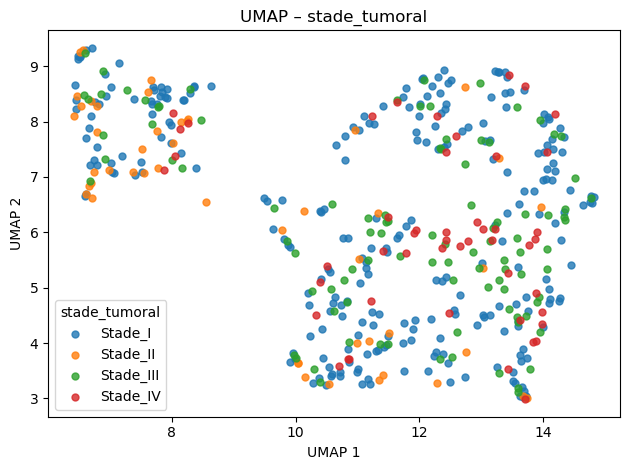

In [130]:
# standardization
X_log = np.log1p(X_out)

# UMAP 
frequences_umap = umap.UMAP(n_components=2, n_neighbors=10, min_dist=0.1, random_state=42).fit_transform(X_log)

plt.figure()
for i, name in enumerate(class_names):
    mask = labels == i
    plt.scatter(frequences_umap[mask, 0], frequences_umap[mask, 1], label=name,s=25, alpha=0.8)

plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title(f"UMAP – {choix}")
plt.legend(title=f"{choix}", loc="best")
plt.tight_layout()
plt.savefig(f"../results/UMAP_{choix}.pdf")
plt.show()

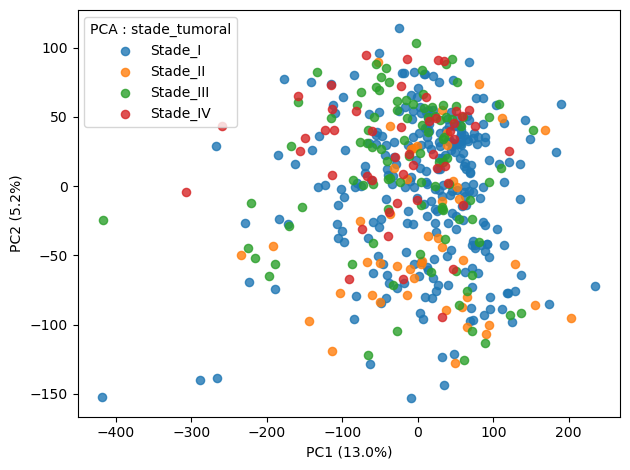

In [131]:
from sklearn.decomposition import PCA
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(StandardScaler().fit_transform(X_log))
df_pca = pd.DataFrame(X_pca, index=X_out.index, columns=["PC1", "PC2"])

# map les labels 
label_map = dict(enumerate(class_names))
df_pca["label"] = labels
df_pca["class_name"] = df_pca["label"].map(label_map)

# Plot
plt.figure()

for i, name in enumerate(class_names):
    subset = df_pca[df_pca["label"] == i]
    plt.scatter(
        subset["PC1"],
        subset["PC2"],
        label=name,
        alpha=0.8,
        s=35)

plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.legend(title=f"PCA : {choix}", loc="best")
plt.tight_layout()
plt.savefig(f"../results/PCA_{choix}.pdf")
plt.show()


# **Split les données train et test**

splitting

In [132]:
# Split train/validation/test par HVG
X_train, X_temp, y_train, y_temp = train_test_split(
    X_out, labels, test_size=0.3, random_state=42, stratify=labels
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"\nTailles des ensembles:")
print(f"Train: {X_train.shape[0]}")
print(f"Validation: {X_val.shape[0]}")
print(f"Test: {X_test.shape[0]}")



Tailles des ensembles:
Train: 322
Validation: 69
Test: 69


In [133]:
#Preprocessing n°2, sélection par ANOVA des gènes les plus significatifs pour distinguer les classes
from sklearn.feature_selection import SelectKBest, f_classif
k=500 #nombre de gènes conservés
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_train, y_train)
mask = selector.get_support()

X_train = X_train.loc[:, mask]
X_val   = X_val.loc[:, mask]
X_test  = X_test.loc[:, mask]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [   24   279  2189 ... 60650 60653 60657] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [134]:
def print_class_distribution(y, name, class_names=None):
    counts = pd.Series(y).value_counts().sort_index()

    print(f"\n{name} set:")
    for cls, n in counts.items():
        if class_names is not None:
            print(f"  {class_names[cls]}: {n}")
        else:
            print(f"  Class {cls}: {n}")
            
print_class_distribution(y_train, "Train", class_names)
print_class_distribution(y_val,   "Validation", class_names)
print_class_distribution(y_test,  "Test", class_names)


Train set:
  Stade_I: 185
  Stade_II: 34
  Stade_III: 69
  Stade_IV: 34

Validation set:
  Stade_I: 39
  Stade_II: 7
  Stade_III: 15
  Stade_IV: 8

Test set:
  Stade_I: 40
  Stade_II: 7
  Stade_III: 15
  Stade_IV: 7


In [135]:
# log transform
X_train_log = np.log1p(X_train)
X_test_log  = np.log1p(X_test)
X_val_log  = np.log1p(X_val)

# scaler (FIT SUR LE TRAIN UNIQUEMENT)
scaler = StandardScaler()
X_train_final = scaler.fit_transform(X_train_log)
X_test_final  = scaler.transform(X_test_log)
X_val_final  = scaler.transform(X_val_log)

In [136]:
# encode labels si nécessaire
# if labels.dtype == object:
#     label_encoder = LabelEncoder()
#     y_train = label_encoder.fit_transform(y_train)
#     y_test  = label_encoder.transform(y_test)
#     n_classes = len(label_encoder.classes_)
# else:
#     n_classes = len(np.unique(y_train))

### Vérification des données avant entrainement

In [137]:
print("NaN par colonne (top 10):")
print(pd.DataFrame(X_train_final).isna().sum().sort_values(ascending=False).head(10))
if sum(pd.DataFrame(X_train_final).isna().sum().sort_values(ascending=False)) >0 : 
    print("ATTENTION : il y'a des NaN")

NaN par colonne (top 10):
0      0
329    0
342    0
341    0
340    0
339    0
338    0
337    0
336    0
335    0
dtype: int64


In [138]:
def sanity_checks(X, y, name=""):
    assert not np.isnan(X).any(), f"{name}: NaN in X"
    assert not np.isinf(X).any(), f"{name}: Inf in X"
    assert len(np.unique(y)) > 1, f"{name}: single class only"
    print(f"{name} OK")

sanity_checks(X_train_final, y_train, "TRAIN")
sanity_checks(X_val_final, y_val, "VAL")
sanity_checks(X_test_final, y_test, "TEST")

TRAIN OK
VAL OK
TEST OK


ici, il faut faire attention. Si une catégorie est en dessous de 5, on ne peut pas l'utiliser

In [139]:
for split, y in zip(
    ["train", "val", "test"],
    [y_train, y_val, y_test]
):
    print(split, np.bincount(y))

train [185  34  69  34]
val [39  7 15  8]
test [40  7 15  7]


# **Modèle dense à 3 couches**

trop de gènes par rapport au nombre de patients peut accroitre l'overfitting. On fait un modèle qui n'a que 3 couches


In [140]:
def build_model(input_dim, n_classes, output_activation, loss):
    """
    Construit et compile un réseau de neurones dense pour classification
    binaire ou multi-classe selon l'activation de sortie.
    """
    learning_rate=1e-3 
    l2_reg=1e-4
    dropout_rate=0.2
    
    inputs = keras.Input(shape=(input_dim,))

    # Backbone
    x = keras.layers.Dense(128, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg))(inputs)
    x = keras.layers.Dropout(dropout_rate)(x)
    
    x = keras.layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l2(l2_reg))(x)

    # Output layer
    outputs = keras.layers.Dense(n_classes, activation=output_activation)(x)

    model = keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=loss,
        metrics=["accuracy"]
    )

    return model

In [141]:
# définition du modèle
model = build_model(
    input_dim=X_train_final.shape[1],
    n_classes=n_classes,
    output_activation=output_activation,
    loss=loss
)

# définition du early stop
early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True
)

In [142]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 4)              │            68 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,260 (258.83 KB)

 Trainable params: 66,260 (258.83 KB)

 Non-trainable params: 0 (0.00 B)

In [143]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_final, y_train)
dummy.score(X_test_final, y_test)


0.5797101449275363

# **Training**

In [144]:
training_history = model.fit(
    X_train_final,
    y_train,
    validation_data=(X_val_final, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3292 - loss: 1.4925 - val_accuracy: 0.4928 - val_loss: 1.2732
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5807 - loss: 1.0484 - val_accuracy: 0.4783 - val_loss: 1.2553
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6273 - loss: 0.9018 - val_accuracy: 0.5217 - val_loss: 1.2517
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7050 - loss: 0.8009 - val_accuracy: 0.5507 - val_loss: 1.3213
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7578 - loss: 0.6955 - val_accuracy: 0.5507 - val_loss: 1.3608
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7547 - loss: 0.6632 - val_accuracy: 0.5217 - val_loss: 1.3561
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8292 - loss: 0.5503 - val_accuracy: 0.5362 - val_loss: 1.3783
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8199 - loss: 0.5105 - val_accuracy: 0.5217 - 

# **Evaluation**

## *Training evaluation*

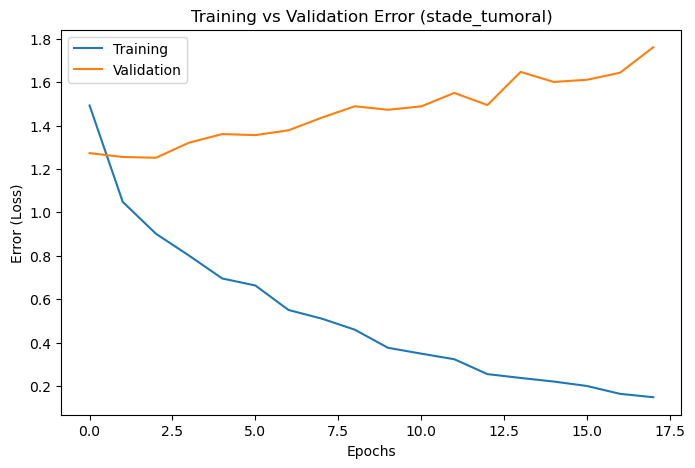

In [145]:
plt.figure(figsize=(8,5))
plt.plot(training_history.history['loss'], label='Training')
plt.plot(training_history.history['val_loss'], label='Validation')
plt.title(f'Training vs Validation Error ({choix})')
plt.xlabel('Epochs')
plt.ylabel('Error (Loss)')
plt.legend()
plt.show()

In [151]:
def predict_classes(model, X, choix):
    probs = model.predict(X)

    # if choix == "stade_tumoral":
    #     # binaire
    #     preds = (probs.flatten() >= 0.5).astype(int)
    # else:
    #     # multi-classes
    preds = np.argmax(probs, axis=1)

    return probs, preds

In [152]:
def evaluate_model(y_true, y_pred, class_names=None, title="Confusion matrix"):

    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average="macro"
    )

    # noms des classes
    if class_names is None:
        class_names = [str(i) for i in range(cm.shape[0])]

    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

    # plot
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.tight_layout()
    plt.show()

    print("Evaluation summary:")
    print(f" Accuracy:  {acc:.3f}")
    print(f" Precision (macro): {precision:.3f}")
    print(f" Recall (macro):    {recall:.3f}")
    print(f" F1-score (macro):  {f1:.3f}")
    print("\nDetailed classification report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names))

    return cm_df

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  


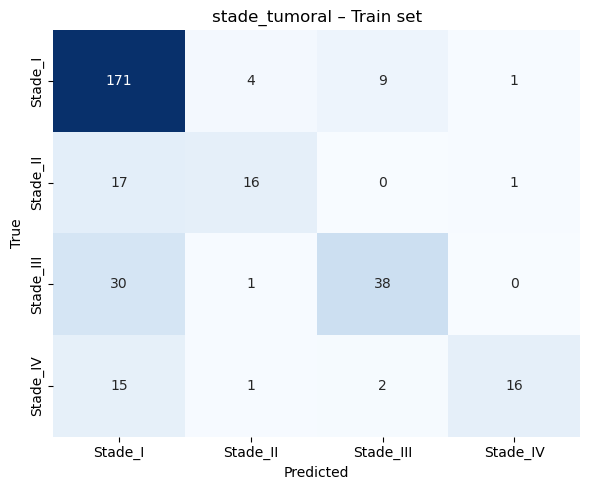

Evaluation summary:
 Accuracy:  0.748
 Precision (macro): 0.781
 Recall (macro):    0.604
 F1-score (macro):  0.662

Detailed classification report:

              precision    recall  f1-score   support

     Stade_I       0.73      0.92      0.82       185
    Stade_II       0.73      0.47      0.57        34
   Stade_III       0.78      0.55      0.64        69
    Stade_IV       0.89      0.47      0.62        34

    accuracy                           0.75       322
   macro avg       0.78      0.60      0.66       322
weighted avg       0.76      0.75      0.73       322



,Stade_I,Stade_II,Stade_III,Stade_IV
Stade_I,171,4,9,1
Stade_II,17,16,0,1
Stade_III,30,1,38,0
Stade_IV,15,1,2,16


In [153]:
probs_train, y_train_pred = predict_classes(model, X_train_final, choix)

evaluate_model(
    y_train,
    y_train_pred,
    class_names=class_names,
    title=f"{choix} – Train set"
)

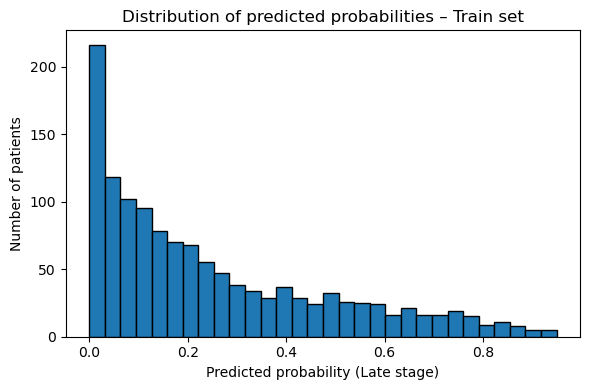

In [154]:
probs = probs_train.flatten()

plt.figure(figsize=(6,4))
plt.hist(probs, bins=30, edgecolor="black")
plt.xlabel("Predicted probability (Late stage)")
plt.ylabel("Number of patients")
plt.title("Distribution of predicted probabilities – Train set")
plt.tight_layout()
plt.show()

In [155]:
def collapse_check(y_true, y_pred):
    unique_preds = np.unique(y_pred)
    if len(unique_preds) == 1:
        print("⚠️ WARNING: Model predicts only one class:", unique_preds[0])
        
collapse_check(y_train, y_train_pred)

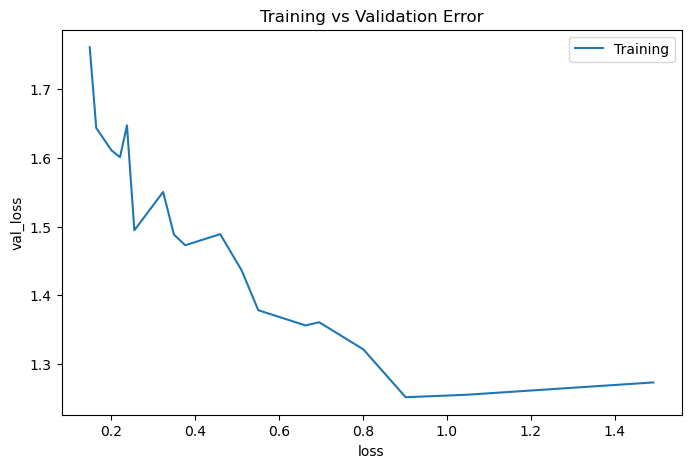

In [156]:
plt.figure(figsize=(8,5))
plt.plot(training_history.history['loss'],training_history.history['val_loss'], label='Training')
# plt.plot(training_history.history['val_loss'], label='Validation')
plt.title('Training vs Validation Error')
plt.xlabel('loss')
plt.ylabel('val_loss')
plt.legend()
plt.show()

## *Test Evaluation*

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


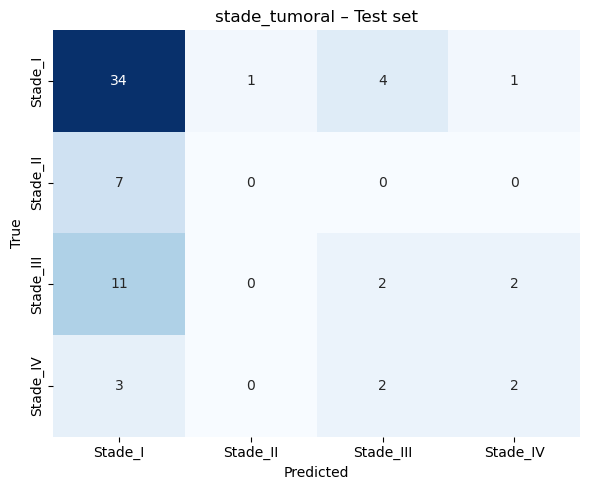

Evaluation summary:
 Accuracy:  0.551
 Precision (macro): 0.317
 Recall (macro):    0.317
 F1-score (macro):  0.306

Detailed classification report:

              precision    recall  f1-score   support

     Stade_I       0.62      0.85      0.72        40
    Stade_II       0.00      0.00      0.00         7
   Stade_III       0.25      0.13      0.17        15
    Stade_IV       0.40      0.29      0.33         7

    accuracy                           0.55        69
   macro avg       0.32      0.32      0.31        69
weighted avg       0.45      0.55      0.49        69



,Stade_I,Stade_II,Stade_III,Stade_IV
Stade_I,34,1,4,1
Stade_II,7,0,0,0
Stade_III,11,0,2,2
Stade_IV,3,0,2,2


In [157]:
probs_test, y_test_pred  = predict_classes(model, X_test_final, choix)

evaluate_model(
    y_test,
    y_test_pred,
    class_names=class_names,
    title=f"{choix} – Test set"
)

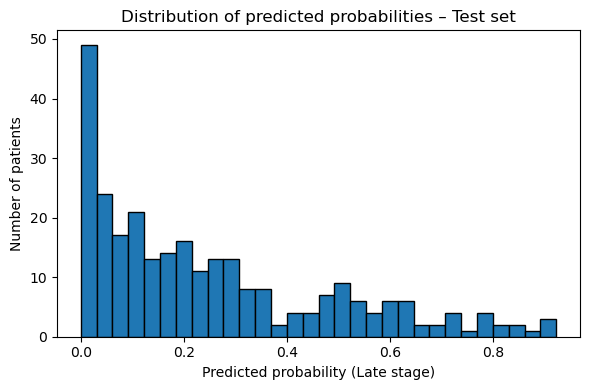

In [158]:
probs = probs_test.flatten()

plt.figure(figsize=(6,4))
plt.hist(probs, bins=30, edgecolor="black")
plt.xlabel("Predicted probability (Late stage)")
plt.ylabel("Number of patients")
plt.title("Distribution of predicted probabilities – Test set")
plt.tight_layout()
plt.show()

In [159]:
def collapse_check(y_true, y_pred):
    unique_preds = np.unique(y_pred)
    if len(unique_preds) == 1:
        print("⚠️ WARNING: Model predicts only one class:", unique_preds[0])
        
collapse_check(y_test, y_test_pred)

### enregistrer les résultats en pdf

In [160]:
def save_full_evaluation_pdf(
    y_train,
    y_train_pred,
    y_test,
    y_test_pred,
    class_names,
    history,
    choix,
    output_dir="../results"
):
    import os
    from matplotlib.backends.backend_pdf import PdfPages
    from sklearn.metrics import (
        confusion_matrix,
        accuracy_score,
        precision_recall_fscore_support,
        classification_report
    )

    os.makedirs(output_dir, exist_ok=True)
    pdf_path = f"{output_dir}/evaluation_{choix}.pdf"

    def compute_metrics(y_true, y_pred):
        acc = accuracy_score(y_true, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_true, y_pred, average="macro"
        )
        report = classification_report(
            y_true, y_pred, target_names=class_names
        )
        cm = confusion_matrix(y_true, y_pred)
        cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
        return acc, precision, recall, f1, report, cm_df


    with PdfPages(pdf_path) as pdf:

        # ===== TRAIN =====
        acc, precision, recall, f1, report, cm_df = compute_metrics(
            y_train, y_train_pred
        )

        fig, ax = plt.subplots(figsize=(7, 6))
        sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
        ax.set_title(f"Confusion Matrix – TRAIN ({choix})")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")
        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

        fig, ax = plt.subplots(figsize=(8, 10))
        ax.axis("off")
        ax.text(
            0.01, 0.98,
            f"TRAIN SET\n\n"
            f"Accuracy: {acc:.3f}\n"
            f"Precision (macro): {precision:.3f}\n"
            f"Recall (macro): {recall:.3f}\n"
            f"F1-score (macro): {f1:.3f}\n\n"
            "Classification report:\n",
            va="top",
            fontsize=11
        )
        ax.text(0.01, 0.60, report, va="top", family="monospace", fontsize=9)
        ax.set_title(f"Train evaluation – {choix}", fontsize=14)
        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

        # ===== TEST =====
        acc, precision, recall, f1, report, cm_df = compute_metrics(
            y_test, y_test_pred
        )

        fig, ax = plt.subplots(figsize=(7, 6))
        sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
        ax.set_title(f"Confusion Matrix – TEST ({choix})")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("True")
        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

        fig, ax = plt.subplots(figsize=(8, 10))
        ax.axis("off")
        ax.text(
            0.01, 0.98,
            f"TEST SET\n\n"
            f"Accuracy: {acc:.3f}\n"
            f"Precision (macro): {precision:.3f}\n"
            f"Recall (macro): {recall:.3f}\n"
            f"F1-score (macro): {f1:.3f}\n\n"
            "Classification report:\n",
            va="top",
            fontsize=11
        )
        ax.text(0.01, 0.60, report, va="top", family="monospace", fontsize=9)
        ax.set_title(f"Test evaluation – {choix}", fontsize=14)
        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

        # ===== LEARNING CURVE =====
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(history.history["loss"], label="Train loss")
        ax.plot(history.history["val_loss"], label="Validation loss")
        ax.set_title(f"Training vs Validation loss – {choix}")
        ax.set_xlabel("Epoch")
        ax.set_ylabel("Loss")
        ax.legend()
        fig.tight_layout()
        pdf.savefig(fig)
        plt.close(fig)

    print(f"PDF sauvegardé : {pdf_path}")

save_full_evaluation_pdf(
    y_train=y_train,
    y_train_pred=y_train_pred,
    y_test=y_test,
    y_test_pred=y_test_pred,
    class_names=class_names,
    history=training_history,
    choix=choix
)

PDF sauvegardé : ../results/evaluation_stade_tumoral.pdf
